## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata,study_results, on ="Mouse ID")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num = len(merge_df["Mouse ID"].unique())
print(f"{num} mice were used for this study")

249 mice were used for this study


In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_mice = merge_df.groupby(["Mouse ID","Timepoint"])
error_mice = grouped_mice.filter(lambda x: x["Sex"].count()>1)
error_list = error_mouse_data["Mouse ID"].unique()    
error_list

array(['g989'], dtype=object)

In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
error_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"].isin(error_list)==False]

In [41]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_df["Mouse ID"].unique())
clean_mice_count

248

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_group = clean_df.groupby("Drug Regimen")
drug_names = regimen_group["Drug Regimen"].unique()
mean = regimen_group["Tumor Volume (mm3)"].mean()
median = regimen_group["Tumor Volume (mm3)"].median()
var = regimen_group["Tumor Volume (mm3)"].var()
sd = regimen_group["Tumor Volume (mm3)"].std()
sem = regimen_group["Tumor Volume (mm3)"].sem()
regimen_summary = pd.DataFrame({"Mean Tumor Size (mm3)":mean,
                               "Median Tumor Vol (mm3)":median,
                               "Variance":var,
                               "Standard Deviation":sd,
                               "Standard Error Mean":sem})
regimen_summary

,Mean Tumor Size (mm3),Median Tumor Vol (mm3),Variance,Standard Deviation,Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_group["Tumor Volume (mm3)"].aggregate(['mean', 'median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [43]:
import numpy as np

[array(['Capomulin'], dtype=object),
 array(['Ceftamin'], dtype=object),
 array(['Infubinol'], dtype=object),
 array(['Ketapril'], dtype=object),
 array(['Naftisol'], dtype=object),
 array(['Placebo'], dtype=object),
 array(['Propriva'], dtype=object),
 array(['Ramicane'], dtype=object),
 array(['Stelasyn'], dtype=object),
 array(['Zoniferol'], dtype=object)]

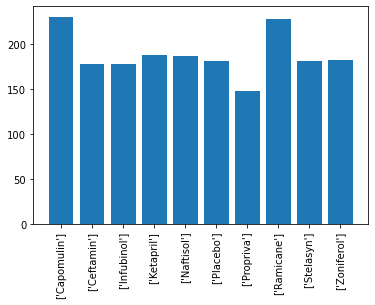

In [55]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
x_axis = np.arange(len(regimen_summary))
ticks = [x for x in x_axis] 
plt.bar(x_axis, regimen_group["Timepoint"].count())
plt.xticks(ticks, regimen_group["Drug Regimen"].unique(), rotation = "vertical")
plt.show()

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



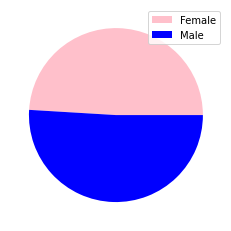

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fem = len(clean_df.loc[clean_df["Sex"]=="Female"])
male = len(clean_df.loc[clean_df["Sex"]=="Male"])
plt.pie([fem,male], colors = ["pink", "blue"])
plt.legend(["Female","Male"], loc = "best")

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
